<a href="https://colab.research.google.com/github/Biologia-03/skills-introduction-to-github/blob/main/Thyroid_nodules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import các thư viện cần thiết

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
import pickle
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import log_loss, roc_auc_score, average_precision_score

# **Import và đọc data**

In [ ]:
df =pd.read_csv("/content/drive/MyDrive/Projects/Project 3 - Predict BN MN thyroid nodules /dataset.csv")

In [ ]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
df.isnull().sum()     #check missing values

,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


In [ ]:
df.shape

(383, 17)

# Nắm rõ các biến trong datafame

In [ ]:
obj_cols = df.select_dtypes(include = 'object').columns   #Chọn ra các biến là categorical

for col in obj_cols:
    unique_vals = df[col].unique()
    n_unique = df[col].nunique()
    print(f"Column: {col}")
    print(f"  Number of unique values: {n_unique}")
    print(f"  Values: {unique_vals}\n")


Column: Gender
  Number of unique values: 2
  Values: ['F' 'M']

Column: Smoking
  Number of unique values: 2
  Values: ['No' 'Yes']

Column: Hx Smoking
  Number of unique values: 2
  Values: ['No' 'Yes']

Column: Hx Radiothreapy
  Number of unique values: 2
  Values: ['No' 'Yes']

Column: Thyroid Function
  Number of unique values: 5
  Values: ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']

Column: Physical Examination
  Number of unique values: 5
  Values: ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']

Column: Adenopathy
  Number of unique values: 6
  Values: ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']

Column: Pathology
  Number of unique values: 4
  Values: ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']

Column: Focality
  Number of unique values: 2
  Values: ['Uni-Focal' 'Multi-Focal']

Column: Risk
  Number of un

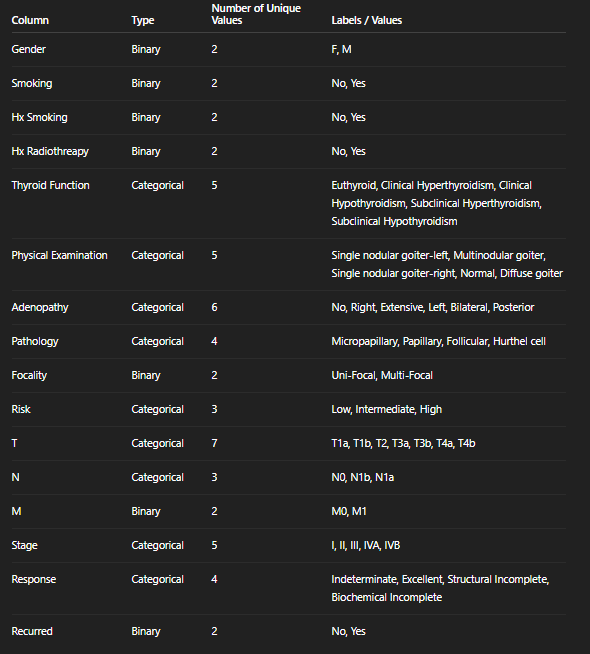

# **Như vậy biến target là recurred - bài toán dự đoán tái phát ung thư giáp**


# PREPROCESSING

1. Label encoding


In [ ]:
#Chuyển string thành integer
le = LabelEncoder()

for cols in obj_cols:
    df[cols] = le.fit_transform(df[cols])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   383 non-null    int64
 1   Gender                383 non-null    int64
 2   Smoking               383 non-null    int64
 3   Hx Smoking            383 non-null    int64
 4   Hx Radiothreapy       383 non-null    int64
 5   Thyroid Function      383 non-null    int64
 6   Physical Examination  383 non-null    int64
 7   Adenopathy            383 non-null    int64
 8   Pathology             383 non-null    int64
 9   Focality              383 non-null    int64
 10  Risk                  383 non-null    int64
 11  T                     383 non-null    int64
 12  N                     383 non-null    int64
 13  M                     383 non-null    int64
 14  Stage                 383 non-null    int64
 15  Response              383 non-null    int64
 16  Recurred

In [ ]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


# Thực hiện các phép thống kê cơ bản

/tmp/ipython-input-4016742823.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette='viridis')
/tmp/ipython-input-4016742823.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette='viridis')
/tmp/ipython-input-4016742823.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette='viridis')
/tmp/ipython-input-4016742823.py:12: FutureWarning: 

Passing `palette

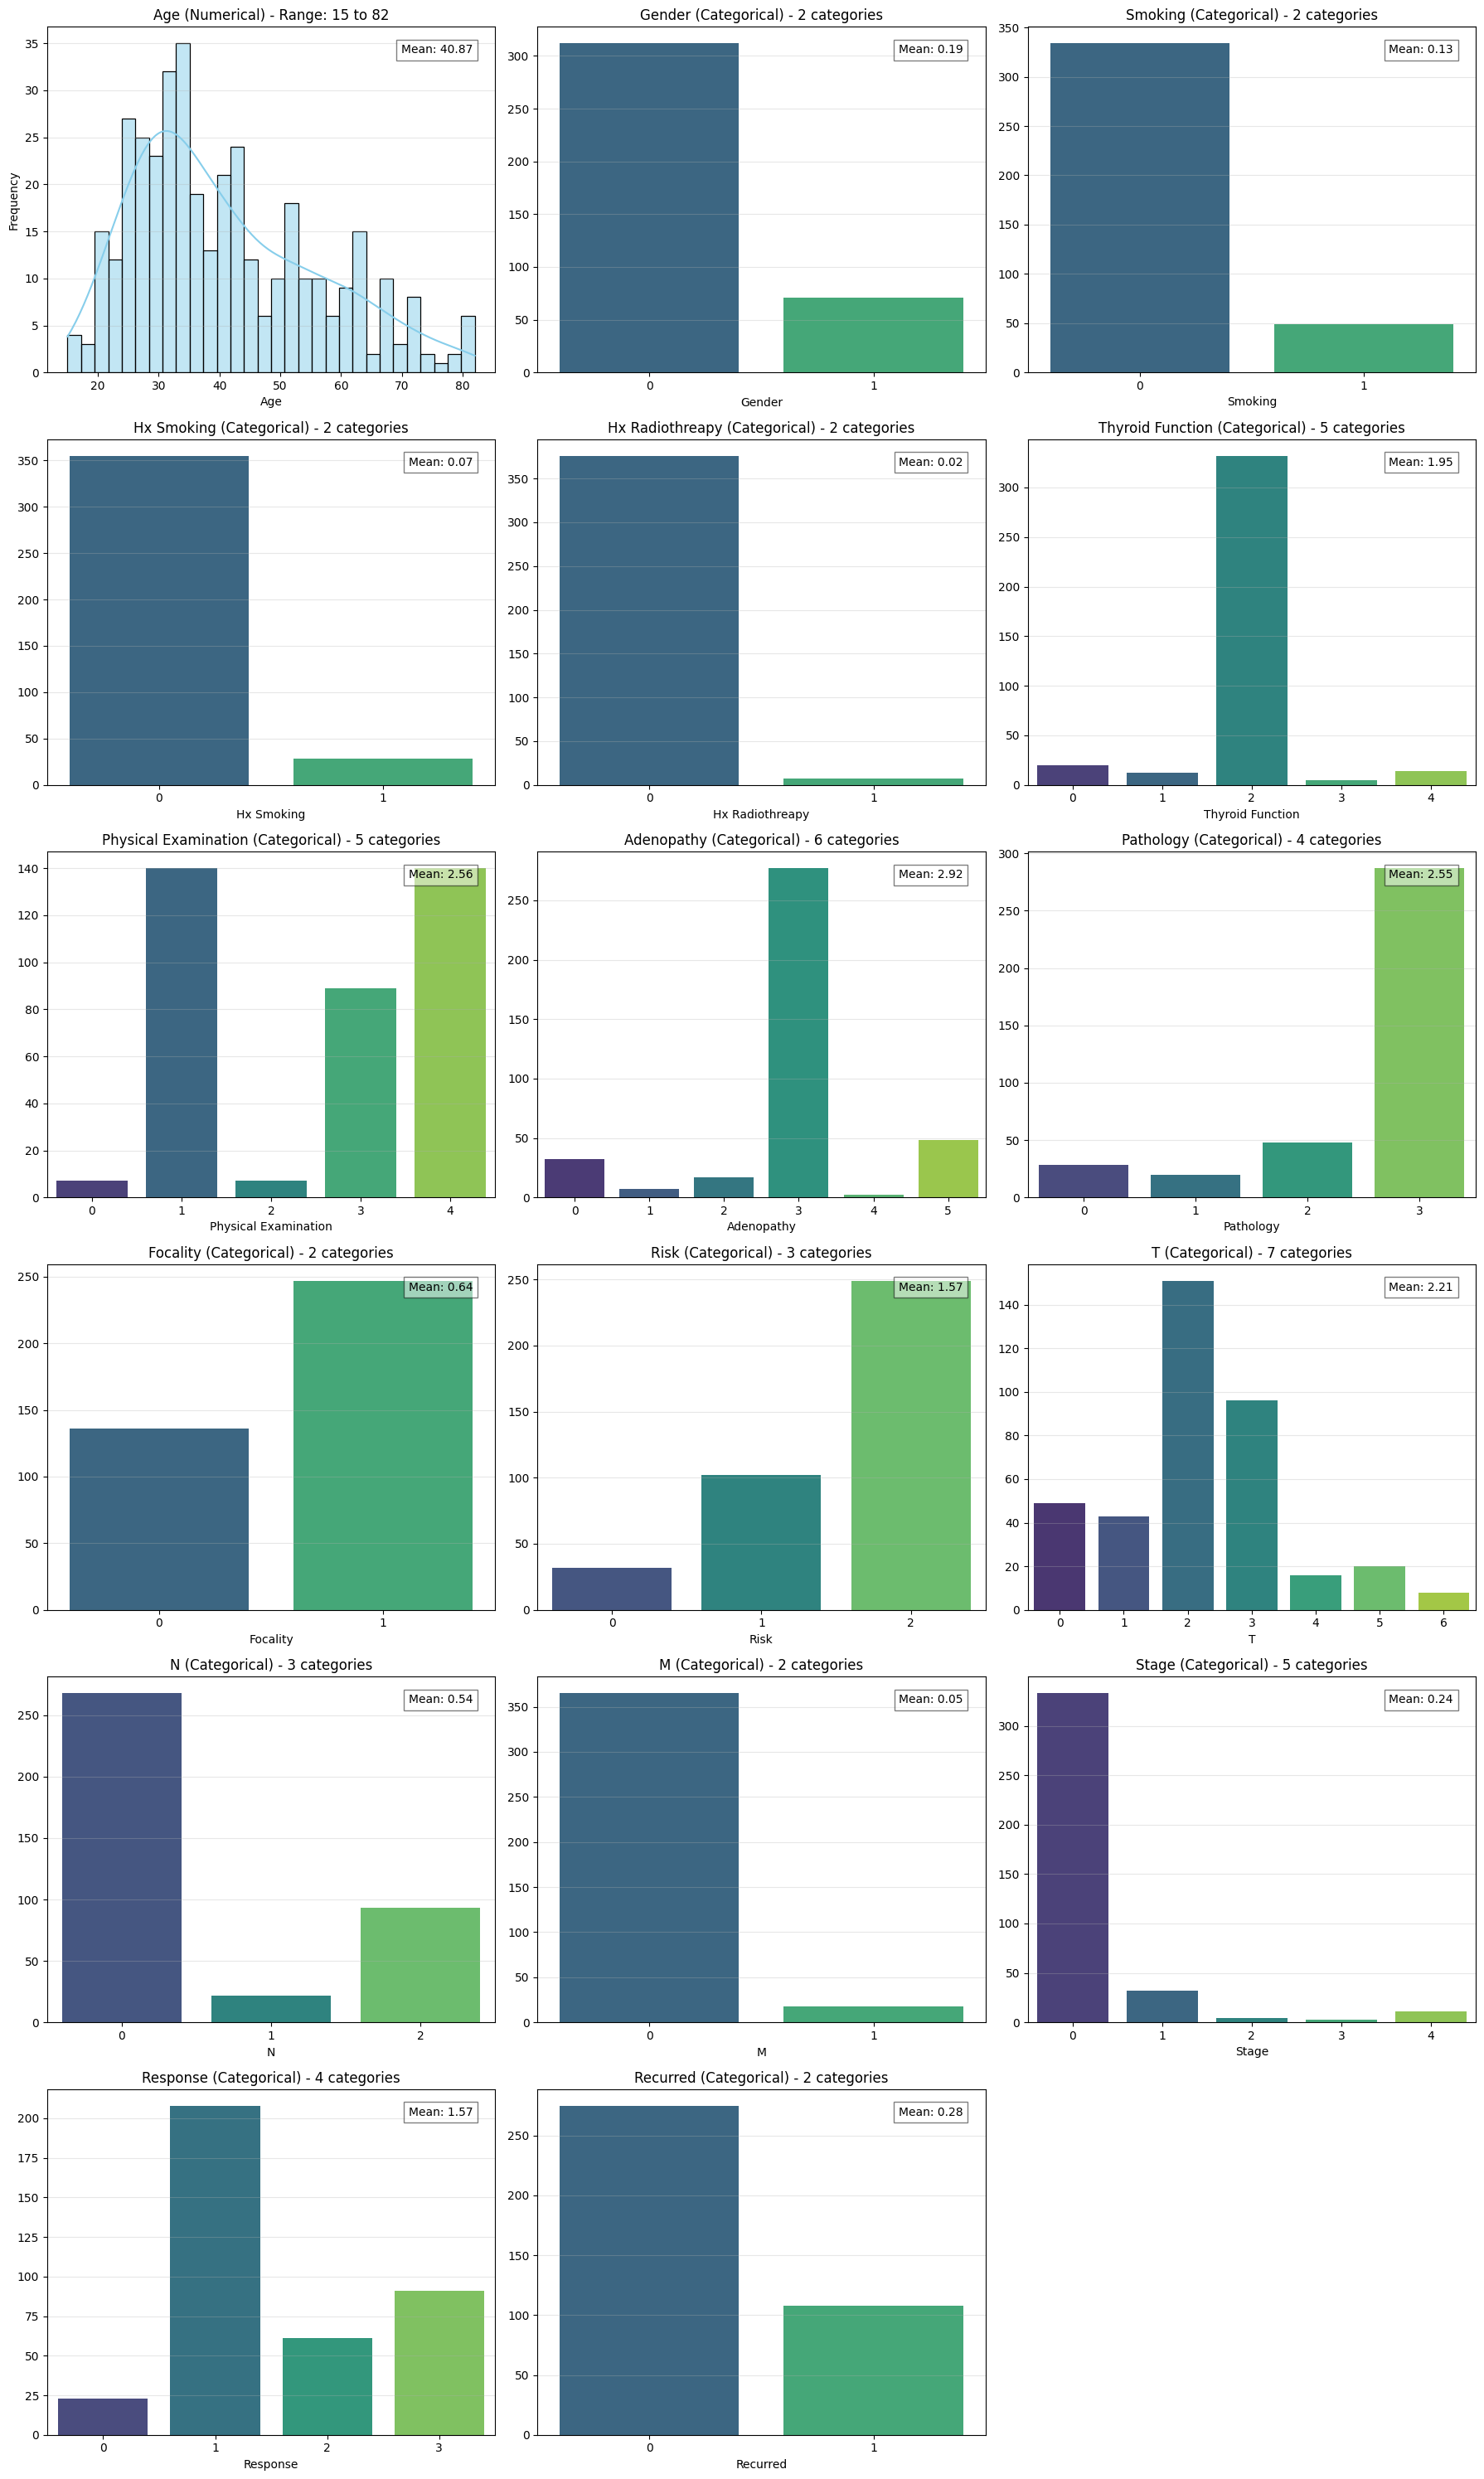

In [ ]:
n_cols = len(df.columns)
n_rows = (n_cols + 3 - 1) // 3  # 3 cột mỗi hàng

fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]  # Xử lý trường hợp chỉ có 1 hàng

for i, col in enumerate(df.columns):
    unique_count = df[col].nunique()

    if unique_count <= 15:  # Biến phân loại (categorical)
        value_counts = df[col].value_counts().sort_index()
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette='viridis')
        axes[i].set_title(f'{col} (Categorical) - {unique_count} categories', fontsize=12)
    else:  # Biến số (numerical)
        sns.histplot(df[col], ax=axes[i], kde=True, color='skyblue', bins=min(30, unique_count))
        axes[i].set_title(f'{col} (Numerical) - Range: {df[col].min()} to {df[col].max()}', fontsize=12)
        axes[i].set_ylabel('Frequency')

    axes[i].set_xlabel(col)
    axes[i].grid(axis='y', alpha=0.3)

    # Hiển thị mean ở góc trên bên phải
    mean_val = df[col].mean()
    axes[i].text(0.95, 0.95, f'Mean: {mean_val:.2f}',
                 horizontalalignment='right', verticalalignment='top',
                 transform=axes[i].transAxes,
                 fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Ẩn các subplot thừa
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

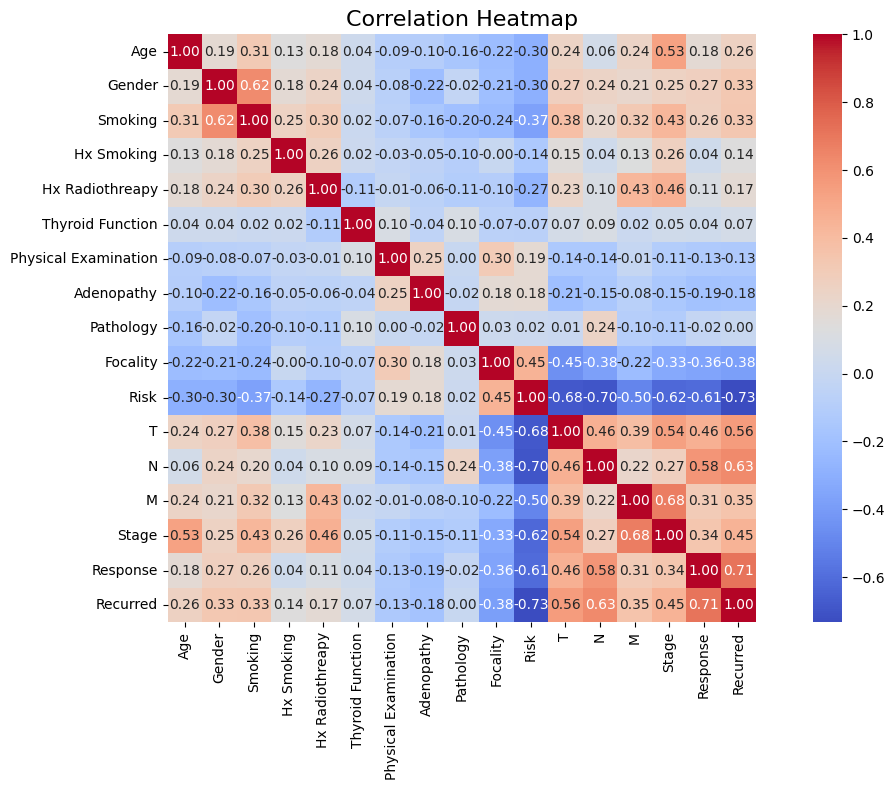

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()  # Tính ma trận tương quan
sns.heatmap(correlation_matrix,
            annot=True,        # Hiển thị giá trị số trong từng ô
            fmt=".2f",         # Định dạng số
            cmap="coolwarm",   # Bản đồ màu
            cbar=True,         # Hiển thị thanh màu bên cạnh
            square=True)       # Ô vuông

plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

**Nhận xét:** có thể thấy các biến có tương quan rất cao với target của chúng ta bao gồm T, N, M, Stage. Response. Đây là những biến không đưa vào mô hình vì bản chất nó là các biến được ghi nhận trong quá trình theo dõi và điều trị, chúng đã chứa thông tin tiên lượng mạnh rồi, đặc biệt là tính đáp ứng điều trị (0.71), chúng sẽ gây overfiting và không thể khái quát trên data mới

In [ ]:
df['Recurred'].value_counts()

,count
Recurred,
0,275
1,108


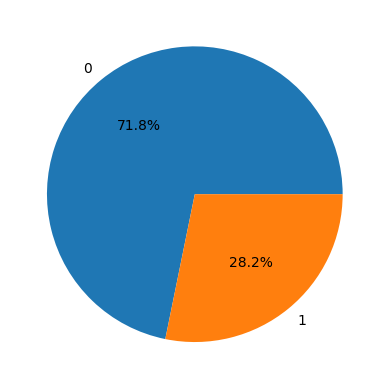

In [ ]:
outcome_counts = df["Recurred"].value_counts()
plt.pie(outcome_counts, labels = outcome_counts.index, autopct = "%1.1f%%")
plt.show()

**Nhận xét:** có thể thấy target của chúng ta khá mất cân bằng, chúng ta sẽ slip sau đó cân bằng lại trên tập train

In [ ]:
X = df.iloc[:, :-6]   #Lấy tất cả các cột trừ 8 cột cuối cùng (loại đi T. N, M, Stage, Response và biến target) và thêm các feature đã tạo
y = df['Recurred']    #Lấy cột Recurred làm biến mục tiêu

**Chia raw data theo tỷ lệ 7:3**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
X_train.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk
335,29,1,0,0,0,2,1,1,3,0,1
140,28,0,0,0,0,2,1,3,3,1,2
132,32,0,0,0,0,2,4,3,3,1,2
253,38,0,0,0,0,2,1,3,0,0,2
153,63,0,0,0,0,2,2,3,3,1,2


# FEATURES ENGINEERING

In [ ]:
def add_features(df):
    # Tạo biến High_Risk_Pathology (Follicular=2, Hurthei cell=3 là high risk) = Đánh dấu các loại mô bệnh học có nguy cơ cao
    # Follicular (2) và Hurthle cell (3) là các type có xu hướng xâm lấn mạnh hơn, di căn xa nhiều hơn so với papillary thông thường
    df['High_Risk_Pathology'] = ((df['Pathology'] == 2) | (df['Pathology'] == 3)).astype(int)

    # Tạo biến Has_Adenopathy (Adenopathy != 0 là có hạch) = Phát hiện sự hiện diện của hạch di căn
    df['Has_Adenopathy'] = (df['Adenopathy'] != 0).astype(int)

    # Tạo biến Extensive_Adenopathy (Adenopathy = 2,4,5 là extensive/posterior/bilateral) = Đánh dấu tình trạng di căn hạch lan rộng
    #  Hạch di căn nhiều (2), hai bên (5), hoặc ở vị trí sau (4) thường khó phẫu thuật triệt để hơn và tiên lượng xấu hơn
    df['Extensive_Adenopathy'] = ((df['Adenopathy'] == 2) | (df['Adenopathy'] == 4) | (df['Adenopathy'] == 5)).astype(int)

    # Tạo biến Multinodular (Physical Examination = 1 là multinodular goiter)
    # Bướu đa nhân có thể làm tăng nguy cơ ung thư đa ổ, khó đánh giá toàn bộ tổn thương (dựa vào khám lâm sàng)
    df['Is_Multinodular'] = (df['Physical Examination'] == 1).astype(int)

    # Tạo biến Multi_Focal (Focality = 1 là Multi-Focal)
    df['Multi_Focal'] = (df['Focality'] == 1).astype(int)

    # Tạo biến Goiter_Size (ước lượng kích thước bướu)
    # Bướu lớn (2) thường phức tạp hơn về mặt phẫu thuật, tăng nguy cơ biến chứng
    df['Goiter_Size'] = df['Physical Examination'].map({
        3: 0,  # 3=Normal = nhỏ
        4: 1,  # 4=Diffuse goiter = trung bình
        0: 2,  # 0=Single nodular-left = lớn
        2: 2,  # 2=Single nodular-right = lớn
        1: 2   # 1=Multinodular = lớn
    })

    # Tạo biến Thyroid_Dysfunction (không phải Euthyroid)
    df['Thyroid_Dysfunction'] = (df['Thyroid Function'] != 0).astype(int)  # 0=Euthyroid

    # Clinical risk score = Tổng hợp yếu tố nguy cơ = (Smoking * 2) + (Hx_Smoking * 1) + (Hx_Radiotherapy (ts xạ trị vùng cổ) * 3)
    df['Clinical_Risk_Score'] = (df['Smoking'] * 2 +
                                 df['Hx Smoking'] * 1 +
                                 df['Hx Radiothreapy'] * 3) # Đã sửa lỗi chính tả tại đây

    # Aggressive profile = Hội chứng xâm lấn = (High_Risk_Pathology * 2) + (Focality * 1) + (Has_Adenopathy * 1.5)
    df['Aggressive_Profile'] = (df['High_Risk_Pathology'] * 2 +
                                df['Focality'] * 1 +
                                df['Has_Adenopathy'] * 1.5)

    # Age-Gender risk (0=Nữ, 1=Nam) = tương tác tuổi, giới
    # Nam giới lớn tuổi thường có tiên lượng xấu hơn trong ung thư tuyến giáp
    df['Age_Gender_Risk'] = df['Age'] * df['Gender'] * 0.1

    # Complex Goiter = Đặc điểm bướu phức tạp = (Is_Multinodular * 2) + (Goiter_Size * 1)
    df['Complex_Goiter'] = (df['Is_Multinodular'] * 2 +
                             df['Goiter_Size'])

    # Double History = tiền sử kép (tương tác nhân)
    df['Double_History'] = df['Hx Smoking'] * df['Hx Radiothreapy'] # Đã sửa lỗi chính tả tại đây

    # Tumor Aggressiveness = Đánh giá độ ác tính tổng hợp
    df['Tumor_Aggressiveness'] = (df['High_Risk_Pathology'] * 3 +
                                   df['Multi_Focal'] * 1 +
                                   df['Extensive_Adenopathy'] * 2)

    return df

# Áp dụng lên X_train và X_test
X_train = add_features(X_train)
X_test = add_features(X_test)

In [ ]:
X_train.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,...,Is_Multinodular,Multi_Focal,Goiter_Size,Thyroid_Dysfunction,Clinical_Risk_Score,Aggressive_Profile,Age_Gender_Risk,Complex_Goiter,Double_History,Tumor_Aggressiveness
335,29,1,0,0,0,2,1,1,3,0,...,1,0,2,1,0,3.5,2.9,4,0,3
140,28,0,0,0,0,2,1,3,3,1,...,1,1,2,1,0,4.5,0.0,4,0,4
132,32,0,0,0,0,2,4,3,3,1,...,0,1,1,1,0,4.5,0.0,1,0,4
253,38,0,0,0,0,2,1,3,0,0,...,1,0,2,1,0,1.5,0.0,4,0,0
153,63,0,0,0,0,2,2,3,3,1,...,0,1,2,1,0,4.5,0.0,2,0,4


# FEATURES SELECTION: Mutual Information (MI)
Dùng boruta quá khắt khe nên tôi chuyển qua MI

Risk                    0.283174
Adenopathy              0.193732
Aggressive_Profile      0.126123
Tumor_Aggressiveness    0.124330
Age_Gender_Risk         0.093695
Multi_Focal             0.060901
Physical Examination    0.057280
Extensive_Adenopathy    0.056004
Gender                  0.053092
Focality                0.052942
Clinical_Risk_Score     0.047076
Hx Radiothreapy         0.038905
Pathology               0.037644
Thyroid_Dysfunction     0.006438
Has_Adenopathy          0.005800
Age                     0.003458
Thyroid Function        0.000000
Hx Smoking              0.000000
Smoking                 0.000000
High_Risk_Pathology     0.000000
Is_Multinodular         0.000000
Goiter_Size             0.000000
Complex_Goiter          0.000000
Double_History          0.000000
dtype: float64


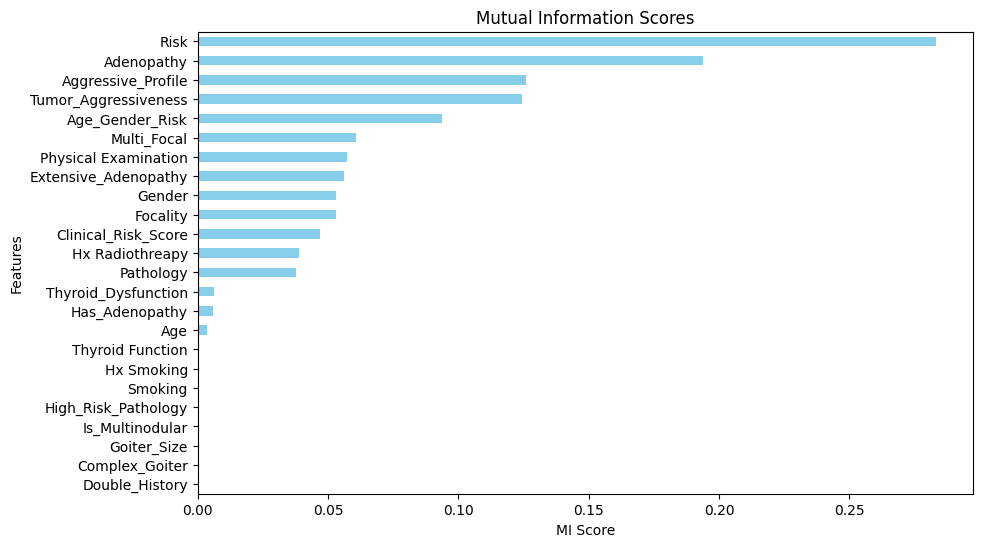

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# Tính MI cho từng biến
mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto', random_state=42)

# Chuyển MI thành Series để dễ sắp xếp và hiển thị
mi_scores = pd.Series(mi_scores, index=X_train.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# In ra MI scores
print(mi_scores)

# Vẽ biểu đồ cột
plt.figure(figsize=(10,6))
mi_scores.sort_values().plot(kind='barh', color='skyblue')  # sort_values() để biến quan trọng nhất ở trên
plt.title('Mutual Information Scores')
plt.xlabel('MI Score')
plt.ylabel('Features')
plt.show()


In [ ]:
# Chọn top k biến
top_k = 13
top_features = mi_scores.sort_values(ascending=False).head(top_k).index
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [ ]:
X_train_selected.head()

,Risk,Adenopathy,Aggressive_Profile,Tumor_Aggressiveness,Age_Gender_Risk,Multi_Focal,Physical Examination,Extensive_Adenopathy,Gender,Focality,Clinical_Risk_Score,Hx Radiothreapy,Pathology
335,1,1,3.5,3,2.9,0,1,0,1,0,0,0,3
140,2,3,4.5,4,0.0,1,1,0,0,1,0,0,3
132,2,3,4.5,4,0.0,1,4,0,0,1,0,0,3
253,2,3,1.5,0,0.0,0,1,0,0,0,0,0,0
153,2,3,4.5,4,0.0,1,2,0,0,1,0,0,3


# CÂN BẰNG TARGET CHO TẬP TRAIN: SMOTE

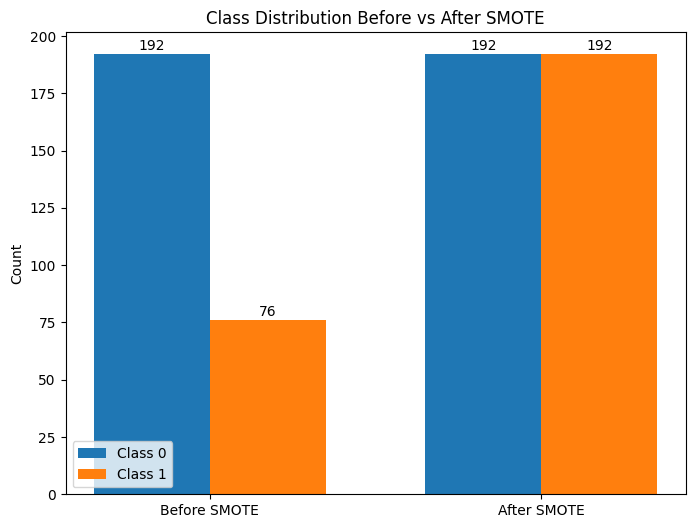

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train)

before = Counter(y_train)
after = Counter(y_train_balanced)

classes = sorted(before.keys())
x_labels = ["Before SMOTE", "After SMOTE"]

# Tạo ma trận số lượng
counts = [
    [before[c] for c in classes],
    [after[c] for c in classes]
]

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))

x = range(len(x_labels))
width = 0.35  # khoảng cách giữa các class

for i, cls in enumerate(classes):
    plt.bar([p + i*width for p in x],
            [counts[0][i], counts[1][i]],
            width=width,
            label=f'Class {cls}')

plt.xticks([p + width/2 for p in x], x_labels)
plt.ylabel("Count")
plt.title("Class Distribution Before vs After SMOTE")
plt.legend()

# Hiển thị số lên cột
for i, cls in enumerate(classes):
    for j, x_pos in enumerate(x):
        value = counts[j][i]
        plt.text(x_pos + i*width, value + 2, str(value), ha='center')

plt.show()

# XÂY DỰNG BASE MODELS

In [ ]:
X_train_balanced.head()

,Risk,Adenopathy,Aggressive_Profile,Tumor_Aggressiveness,Age_Gender_Risk,Multi_Focal,Physical Examination,Extensive_Adenopathy,Gender,Focality,Clinical_Risk_Score,Hx Radiothreapy,Pathology
0,1,1,3.5,3,2.9,0,1,0,1,0,0,0,3
1,2,3,4.5,4,0.0,1,1,0,0,1,0,0,3
2,2,3,4.5,4,0.0,1,4,0,0,1,0,0,3
3,2,3,1.5,0,0.0,0,1,0,0,0,0,0,0
4,2,3,4.5,4,0.0,1,2,0,0,1,0,0,3


**STEP 1: BASE MODEL**

In [ ]:
base_models = [
    ("rf", RandomForestClassifier(
        n_estimators=300, max_depth=5,
        min_samples_split=2, min_samples_leaf=1,
        max_features='sqrt', bootstrap=True,
        random_state=42, class_weight=None)),

    ("cat", CatBoostClassifier(
        iterations=1000, learning_rate=0.03, depth=6,
        l2_leaf_reg=3.0, rsm=0.8, bootstrap_type="Bayesian",
        bagging_temperature=0.5, loss_function="Logloss",
        eval_metric="AUC", auto_class_weights="Balanced",
        random_state=42, verbose=0, allow_writing_files=False,
        thread_count=-1)),

    ("xgb", XGBClassifier(
        n_estimators=400, max_depth=5, learning_rate=0.1,
        subsample=1.0, colsample_bytree=1.0, reg_lambda=1.0,
        eval_metric="logloss", random_state=42)),

    ("lgbm", LGBMClassifier(
        n_estimators=500, max_depth=4, learning_rate=0.05,
        subsample=0.9, colsample_bytree=0.8, reg_lambda=1.0,
        random_state=42)),
]

**Step 2: Hàm Train với OOF (Chỉ sử dụng tập train)**

In [ ]:
def train_bases_oof_only(
    X_train_balanced, y_train_balanced,
    X_test_selected,
    n_splits=5, calibrate=True,
    calib_method="sigmoid", calib_cv=3,
    random_state=42
):
    # Khởi tạo K-Fold
    skf = StratifiedKFold(
        n_splits=n_splits, shuffle=True, random_state=random_state
    )
    n_models = len(base_models)

    # Khởi tạo ma trận predictions
    P_train_oof = np.zeros((len(X_train_balanced), n_models))
    P_test = np.zeros((len(X_test_selected), n_models))

    fitted_bases = []

    for j, (name, base) in enumerate(base_models):
        print(f"Training {name}...")
        oof_col = np.zeros(len(X_train_balanced))

        # OOF Training trên tập train
        for tr_idx, va_idx in skf.split(X_train_balanced, y_train_balanced):
            X_tr = X_train_balanced.iloc[tr_idx]
            y_tr = y_train_balanced.iloc[tr_idx]
            X_va = X_train_balanced.iloc[va_idx]

            if calibrate:
                model = CalibratedClassifierCV(
                    clone(base), method=calib_method, cv=calib_cv)
            else:
                model = clone(base)

            model.fit(X_tr, y_tr)
            oof_col[va_idx] = model.predict_proba(X_va)[:, 1]

        P_train_oof[:, j] = oof_col

        # Huấn luyện model trên toàn bộ tập train để dự đoán test
        if calibrate:
            model_full = CalibratedClassifierCV(
                clone(base), method=calib_method, cv=calib_cv)
        else:
            model_full = clone(base)

        model_full.fit(X_train_balanced, y_train_balanced)
        P_test[:, j] = model_full.predict_proba(X_test_selected)[:, 1]
        fitted_bases.append((name, model_full))

    return P_train_oof, P_test, fitted_bases

**Step 3: Các Phương pháp Ensemble**

In [ ]:
# 1. Equal Weights Ensemble
def equal_weight_probs(P):
    return P.mean(axis=1)

# 2. Stacking với Logistic Regression
def stack_lr_fit(P_train_oof, y_train_balanced):
    meta = LogisticRegression(
        C=1.0, penalty="l2", max_iter=5000, solver="lbfgs", random_state=42
    )
    meta.fit(P_train_oof, y_train_balanced)
    return meta

# 3. Stacking với Optimization (sử dụng OOF predictions làm validation)
def stack_optimize_weights(P_train_oof, y_train_balanced, P_test, method="auc"):
    """
    Tối ưu weights sử dụng OOF predictions làm validation set
    """

    n_models = P_train_oof.shape[1]

    def obj_func(w):
        w = np.maximum(w, 0.0)  # Đảm bảo weights không âm
        s = w.sum()
        if s <= 0:
            return 1e9  # phạt nặng nếu tổng weights âm
        w = w / s  # Chuẩn hóa weights

        # Tính weighted predictions trên OOF
        p_weighted = P_train_oof @ w

        if method == "auc":
            # Tối ưu hóa AUC
            if (p_weighted.max() - p_weighted.min()) < 1e-12:
                return 1.0
            score = roc_auc_score(y_train_balanced, p_weighted)
            return 1.0 - score
        elif method == "logloss":
            # Tối ưu hóa LogLoss
            score = log_loss(y_train_balanced, p_weighted)
            return score

    # Khởi tạo weights ngẫu nhiên
    w0 = np.random.uniform(0, 1, n_models)
    w0 = w0 / w0.sum()

    # Ràng buộc: tổng weights = 1, mỗi weight >= 0
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    bounds = [(0, 1) for _ in range(n_models)]

    # Tối ưu hóa
    result = minimize(
        obj_func, w0,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints,
        options={'maxiter': 1000, 'ftol': 1e-8}
    )

    # Lấy weights tối ưu
    w_opt = np.maximum(result.x, 0.0)
    w_opt = w_opt / (w_opt.sum() + 1e-12)

    # Tính predictions cho train và test
    p_train_opt = P_train_oof @ w_opt
    p_test_opt = P_test @ w_opt

    return p_train_opt, p_test_opt, w_opt

**Step 4: Hệ thống Đánh giá**

In [ ]:
def metrics_report(y_true, p):
    return {
        "AUC": roc_auc_score(y_true, p),
        "LogLoss": log_loss(y_true, p),
        "AP": average_precision_score(y_true, p),
    }

def evaluate_ensembles(X_train_balanced, y_train_balanced, X_test_selected, y_test):
    """
    Đánh giá tất cả phương pháp ensemble trên tập test
    """
    # 1. Huấn luyện base models với OOF
    P_train_oof, P_test, fitted_bases = train_bases_oof_only(
        X_train_balanced, y_train_balanced, X_test_selected
    )

    # 2. Dự đoán với 3 phương pháp ensemble
    # 2.1 Equal Weights
    p_eq_test = equal_weight_probs(P_test)

    # 2.2 Stacking với Logistic Regression
    meta_lr = stack_lr_fit(P_train_oof, y_train_balanced)
    p_stack_test = meta_lr.predict_proba(P_test)[:, 1]

    # 2.3 Stacking với Optimized Weights
    _, p_opt_test, w_opt = stack_optimize_weights(
        P_train_oof, y_train_balanced, P_test, method="auc"
    )

    # 3. Trả về kết quả
    results = [
        {"name": "EqualWeights", **metrics_report(y_test, p_eq_test)},
        {"name": "Stack_LR", **metrics_report(y_test, p_stack_test)},
        {"name": "Stack_Optimized", **metrics_report(y_test, p_opt_test)},
    ]

    # Thêm thông tin weights
    weights_info = {
        "optimized_weights": w_opt,
        "base_model_names": [name for name, _ in base_models]
    }

    return results, weights_info, fitted_bases

**Step 5: Hiển thị Kết quả**

In [ ]:
def pretty_print(title, results):
    print(f"\n=== {title} ===")
    print(f"{'Method':>15} | {'AUC':>8} | {'LogLoss':>8} | {'AP':>8}")
    print("-" * 50)
    for r in results:
        print(f"{r['name']:>15} | {r['AUC']:8.4f} | {r['LogLoss']:8.4f} | {r['AP']:8.4f}")

def print_optimized_weights(weights_info):
    print(f"\n=== Optimized Weights ===")
    for name, weight in zip(weights_info["base_model_names"], weights_info["optimized_weights"]):
        print(f"{name:>15}: {weight:.4f}")

In [ ]:
if __name__ == "__main__":

    # X_train_balanced, y_train_balanced, X_test_selected, y_test

    results, weights_info, fitted_models = evaluate_ensembles(
        X_train_balanced, y_train_balanced, X_test_selected, y_test
    )

    pretty_print("ENSEMBLE METHODS COMPARISON", results)
    print_optimized_weights(weights_info)

    # Lưu các models đã huấn luyện
    print(f"\nTrained {len(fitted_models)} base models")


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with